In [2]:
import pandas as pd
import numpy as np

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

data = pd.read_json('Данные/nea_extended.json')

print(data.head())

   NEO_flag  One_km_NEO_flag      H     G  Num_obs   rms    U  Arc_years  \
0       1.0              1.0  10.31  0.15    11525  0.56  0.0  1893-2021   
1       1.0              1.0  15.59  0.15     2005  0.57  0.0  1911-2022   
2       1.0              1.0  13.83  0.15     2614  0.56  0.0  1918-2022   
3       1.0              1.0   9.21  0.15     7662  0.53  0.0  1924-2022   
4       1.0              1.0  17.38  0.15      551  0.84  0.0  1932-2021   

  Perturbers Perturbers_2  ... Orbital_period Perihelion_dist Aphelion_dist  \
0        M-v          3Ek  ...       1.760846        1.133373      1.783008   
1        M-v          3Ek  ...       4.281766        1.194532      4.079126   
2        M-v          3El  ...       3.888126        1.061648      3.883624   
3        M-v          3El  ...       4.352951        1.244830      4.087118   
4        M-v          3Ek  ...       2.658231        1.082515      2.755368   

  Semilatus_rectum  Synodic_period  Orbit_type  PHA_flag  \
0       

In [3]:
data.info()

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30270 entries, 0 to 30269
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NEO_flag                            30108 non-null  float64
 1   One_km_NEO_flag                     1375 non-null   float64
 2   H                                   30269 non-null  float64
 3   G                                   30269 non-null  float64
 4   Num_obs                             30270 non-null  int64  
 5   rms                                 30270 non-null  float64
 6   U                                   30239 non-null  float64
 7   Arc_years                           8662 non-null   object 
 8   Perturbers                          30270 non-null  object 
 9   Perturbers_2                        30270 non-null  object 
 10  Number                              3108 non-null   object 
 11  Name                                166 n

In [4]:
missing_values_table(data)

Your selected dataframe has 38 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
Name,30104,99.5
Critical_list_numbered_object_flag,29839,98.6
Other_desigs,29736,98.2
One_km_NEO_flag,28895,95.5
PHA_flag,27966,92.4
Number,27162,89.7
Arc_years,21608,71.4
One_opposition_object_flag,10476,34.6
Arc_length,8662,28.6
NEO_flag,162,0.5


In [5]:
# Get the columns with > 20% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 20].index)
print('We will remove %d columns.' % len(missing_columns))


Your selected dataframe has 38 columns.
There are 13 columns that have missing values.
We will remove 9 columns.


In [6]:
data = data.drop(columns=list(missing_columns))

In [7]:
#data = data.select_dtypes(exclude=['object'])
data.head()

,NEO_flag,H,G,Num_obs,rms,U,Perturbers,Perturbers_2,Principal_desig,Epoch,...,Computer,Hex_flags,Last_obs,Tp,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type
0,1.0,10.31,0.15,11525,0.56,0.0,M-v,3Ek,A898 PA,2459887.5,...,Pan,1804,2021-12-02,2.459803e+06,1.760846,1.133373,1.783008,0.692918,2.314326,Amor
1,1.0,15.59,0.15,2005,0.57,0.0,M-v,3Ek,A911 TB,2459887.5,...,MPCLINUX,1804,2022-08-05,2.459956e+06,4.281766,1.194532,4.079126,0.923960,1.304714,Amor
2,1.0,13.83,0.15,2614,0.56,0.0,M-v,3El,A918 AA,2459887.5,...,Pan,1804,2022-08-03,2.459259e+06,3.888126,1.061648,3.883624,0.833734,1.346245,Amor
3,1.0,9.21,0.15,7662,0.53,0.0,M-v,3El,A924 UB,2459887.5,...,MPCLINUX,1804,2022-07-06,2.460569e+06,4.352951,1.244830,4.087118,0.954204,1.298245,Amor
4,1.0,17.38,0.15,551,0.84,0.0,M-v,3Ek,1932 EA1,2459887.5,...,Pan,1804,2021-12-05,2.459867e+06,2.658231,1.082515,2.755368,0.777180,1.603052,Amor


Text(0.5, 1.0, 'H Distribution')

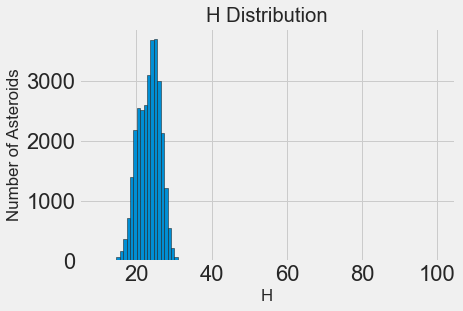

In [8]:
# look at the H distribution
import matplotlib.pyplot as plt
# Histogram of the H (Absolute magnitude)
plt.style.use('fivethirtyeight')
plt.hist(data['H'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('H')
plt.ylabel('Number of Asteroids')
plt.title('H Distribution')

Text(0.5, 1.0, 'Density Plot of H by Orbit type')

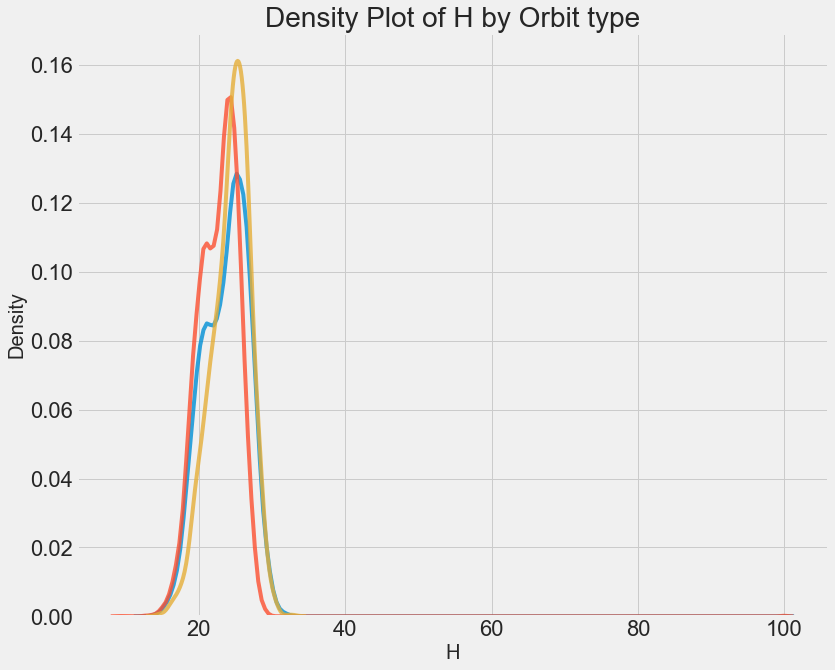

In [9]:
# Create a list of Orbit_type with more than 100 measurements
types = data.dropna(subset=['H'])
types = types['Orbit_type'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Orbit_type'] == b_type]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['H'].dropna(),
               label = b_type, shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('H', size = 20); plt.ylabel('Density', size = 20)
plt.title('Density Plot of H by Orbit type', size = 28)

In [10]:
# Find all correlations and sort 
correlations_data = data.corr()['H'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Num_opps           -0.577229
i                  -0.437204
Num_obs            -0.411884
e                  -0.266228
Semilatus_rectum   -0.149632
G                  -0.121801
a                  -0.089129
Aphelion_dist      -0.086953
rms                -0.084958
Perihelion_dist    -0.044765
Node               -0.020562
Orbital_period     -0.017200
M                  -0.011956
Tp                  0.006206
Synodic_period      0.011974
Name: H, dtype: float64 

a                 -0.089129
Aphelion_dist     -0.086953
rms               -0.084958
Perihelion_dist   -0.044765
Node              -0.020562
Orbital_period    -0.017200
M                 -0.011956
Tp                 0.006206
Synodic_period     0.011974
Peri               0.018929
n                  0.228648
U                  0.650954
H                  1.000000
NEO_flag                NaN
Epoch                   NaN
Name: H, dtype: float64


In [11]:
#delete useless columns
orbit_type_col = data['Orbit_type']
data = data.loc[:, data.columns != 'Orbit_type'].select_dtypes(exclude=['object'])
data = pd.concat([data.drop(columns=['NEO_flag', 'Epoch']), orbit_type_col], axis=1)
data.head()

,H,G,Num_obs,rms,U,M,Peri,Node,i,e,n,a,Num_opps,Tp,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type
0,10.31,0.15,11525,0.56,0.0,47.51665,178.93595,304.28989,10.82769,0.222754,0.559735,1.458191,53,2.459803e+06,1.760846,1.133373,1.783008,0.692918,2.314326,Amor
1,15.59,0.15,2005,0.57,0.0,344.22667,156.25052,183.85721,11.57596,0.546982,0.230187,2.636829,21,2.459956e+06,4.281766,1.194532,4.079126,0.923960,1.304714,Amor
2,13.83,0.15,2614,0.56,0.0,159.38425,350.47773,110.42403,9.39567,0.570641,0.253492,2.472636,37,2.459259e+06,3.888126,1.061648,3.883624,0.833734,1.346245,Amor
3,9.21,0.15,7662,0.53,0.0,205.59196,132.45917,215.50183,26.68356,0.533068,0.226423,2.665974,60,2.460569e+06,4.352951,1.244830,4.087118,0.954204,1.298245,Amor
4,17.38,0.15,551,0.84,0.0,7.47985,26.63322,171.31911,11.88326,0.435879,0.370776,1.918942,20,2.459867e+06,2.658231,1.082515,2.755368,0.777180,1.603052,Amor


In [12]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'H' or col == 'G' or col == 'rms' or col == 'e' or col == 'n' or col == 'Semilatus_rectum':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Orbit_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape


c:\Users\Pig_Astronaut\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(30270, 38)

In [13]:
def remove_collinear_features(x, threshold):

    # Dont want to remove correlations between H
    y = x['H']
    x = x.drop(columns = ['H'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['H'] = y
               
    return x

In [14]:
features = remove_collinear_features(features, 0.6)

In [15]:
features  = features.dropna(axis=1, how = 'all')
features.shape


(30270, 18)

In [16]:
no_target = features[features['H'].isna()]
target = features[features['H'].notnull()]
# Separate out the features and targets
features = target.drop(columns='H')
targets = pd.DataFrame(target['H'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(21188, 17)
(9081, 17)
(21188, 1)
(9081, 1)


In [17]:
# Function to calculate mean absolute error
def mape(y_true, y_pred):
    return np.mean(abs(y_true - y_pred)/abs(y_true))

In [18]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAPE = %0.4f" % mape(y_test, baseline_guess))


The baseline guess is a score of 23.60
Baseline Performance on the test set: MAPE = 0.1090


c:\Users\Pig_Astronaut\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [18]:
# Save the no scores, training, and testing data
no_target.to_csv('Данные/no_score.csv', index = False)
X.to_csv('Данные/training_features.csv', index = False)
X_test.to_csv('Данные/testing_features.csv', index = False)
y.to_csv('Данные/training_labels.csv', index = False)
y_test.to_csv('Данные/testing_labels.csv', index = False)